<a href="https://colab.research.google.com/github/tejaspradhan/Face-Generation-from-Textual-Features-using-GANs/blob/main/Nvidia_StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NVlabs/stylegan3.git

Cloning into 'stylegan3'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 193 (delta 94), reused 185 (delta 87), pack-reused 0
Receiving objects: 100% (193/193), 4.16 MiB | 17.89 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [ ]:
%cd stylegan3
!ls

/content/stylegan3
avg_spectra.py	 Dockerfile	  gen_video.py	metrics      train.py
calc_metrics.py  docs		  gui_utils	README.md    visualizer.py
dataset_tool.py  environment.yml  legacy.py	torch_utils  viz
dnnlib		 gen_images.py	  LICENSE.txt	training


In [ ]:
!pip install Ninja

     |████████████████████████████████| 108 kB 5.6 MB/s 


In [ ]:
import os
import gen_images

In [ ]:

for i in range(0,20):
  print(i)
  !python gen_images.py --outdir=out --trunc=1 --seeds={i} --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-ffhqu-1024x1024.pkl


0
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-ffhqu-1024x1024.pkl"...
Generating image for seed 0 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
1
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-ffhqu-1024x1024.pkl"...
Generating image for seed 1 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
2
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-ffhqu-1024x1024.pkl"...
Generating image for seed 2 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
3
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-ffhqu-1024

# StyleGAN2

In [ ]:
!git clone https://github.com/NVlabs/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 138 (delta 4), reused 10 (delta 4), pack-reused 127
Receiving objects: 100% (138/138), 599.47 KiB | 3.42 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
%cd stylegan2/
!ls

/content/stylegan2
dataset_tool.py  LICENSE.txt		 README.md	   run_training.py
dnnlib		 metrics		 run_generator.py  test_nvcc.cu
Dockerfile	 pretrained_networks.py  run_metrics.py    training
docs		 projector.py		 run_projector.py


In [ ]:
import pretrained_networks
from dnnlib import tflib as tflib
import numpy as np
import PIL.Image
import dnnlib
from matplotlib.pyplot import imshow
%matplotlib inline

network_pkl="gdrive:networks/stylegan2-ffhq-config-f.pkl"
truncation_psi=1.0
seed=6000
print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
print('---- Loaded ----')

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
---- Loaded ----


In [ ]:
print(Gs.components.synthesis.vars.items())
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi

print('Generating image for seed %d...' % (seed))
rnd = np.random.RandomState(seed)
z = rnd.randn(1, *Gs.input_shape[1:])

print("Noise Vars: ",noise_vars)
print("Input size: ",*Gs.input_shape[1:])
print("Input: \n",z)
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) 
images = Gs.run(z, None, **Gs_kwargs)
img=PIL.Image.fromarray(images[0], 'RGB')

odict_items([('noise0', <tf.Variable 'G_synthesis_1/noise0:0' shape=(1, 1, 4, 4) dtype=float32_ref>), ('noise1', <tf.Variable 'G_synthesis_1/noise1:0' shape=(1, 1, 8, 8) dtype=float32_ref>), ('noise2', <tf.Variable 'G_synthesis_1/noise2:0' shape=(1, 1, 8, 8) dtype=float32_ref>), ('noise3', <tf.Variable 'G_synthesis_1/noise3:0' shape=(1, 1, 16, 16) dtype=float32_ref>), ('noise4', <tf.Variable 'G_synthesis_1/noise4:0' shape=(1, 1, 16, 16) dtype=float32_ref>), ('noise5', <tf.Variable 'G_synthesis_1/noise5:0' shape=(1, 1, 32, 32) dtype=float32_ref>), ('noise6', <tf.Variable 'G_synthesis_1/noise6:0' shape=(1, 1, 32, 32) dtype=float32_ref>), ('noise7', <tf.Variable 'G_synthesis_1/noise7:0' shape=(1, 1, 64, 64) dtype=float32_ref>), ('noise8', <tf.Variable 'G_synthesis_1/noise8:0' shape=(1, 1, 64, 64) dtype=float32_ref>), ('noise9', <tf.Variable 'G_synthesis_1/noise9:0' shape=(1, 1, 128, 128) dtype=float32_ref>), ('noise10', <tf.Variable 'G_synthesis_1/noise10:0' shape=(1, 1, 128, 128) dtype=f

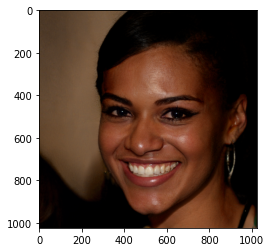

In [ ]:
imshow(img)

In [ ]:
print(img.shape())

AttributeError: ignored

In [ ]:
!python run_generator.py generate-images --network=gdrive:networks/stylegan2-ffhq-config-f.pkl \
  --seeds=6600-6625 --truncation-psi=0.5

Local submit - run_dir: results/00000-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating image for seed 6600 (0/26) ...
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 661

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 3.4 MB 9.1 MB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 1.2 MB 37.9 MB/s 
     |████████████████████████████████| 61 kB 531 kB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
     |████████████████████████████████| 895 kB 48.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=8f4663cd127be5cad18442b4d7aa97aac2a31b611703de0c520cf9f8bc014f11
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=512, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])
model.encode('hello world').shape

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

(512,)

In [ ]:
nlp_output=model.encode('woman with round face black eyes and straight hair')

In [ ]:
print(nlp_output)

[ 0.05730598 -0.3661793   0.11117875  0.07159594 -0.02561141  0.35104316
 -0.12081416  0.2981415  -0.40084365  0.12882657 -0.19789502 -0.09795176
  0.01041013  0.15945283  0.26846683 -0.5481049   0.01616927  0.10958285
  0.15422532 -0.02480106  0.1677736  -0.45751595 -0.07674269 -0.0884428
  0.07117007  0.08674361  0.17988898 -0.3319339   0.28128013  0.10367899
  0.0610156  -0.08282582 -0.07381303  0.05610047 -0.03357284 -0.23654902
  0.00327224  0.10731772  0.15460378 -0.17478557 -0.2748229  -0.35547078
 -0.2129274   0.23427285 -0.02243351 -0.01398507  0.40312338  0.00419897
 -0.34894103 -0.25420904 -0.1868177   0.21570057  0.14274977 -0.17313857
  0.11002807 -0.3546491   0.52889794  0.05112638 -0.2385998   0.10221793
 -0.05635982  0.33525756 -0.46447384 -0.02600628 -0.05217336 -0.01185456
 -0.00407432 -0.19485624  0.2195341   0.2079835  -0.2879079  -0.32551023
  0.12739989  0.17670678 -0.28637046 -0.10764088 -0.1250802   0.1816752
  0.06260799 -0.18286933  0.29497188 -0.0875685  -0.0

In [ ]:
import pretrained_networks
from dnnlib import tflib as tflib
import numpy as np
import PIL.Image
import dnnlib
from matplotlib.pyplot import imshow
%matplotlib inline

network_pkl="gdrive:networks/stylegan2-ffhq-config-f.pkl"
truncation_psi=1.0
seed=6000
print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
print('---- Loaded ----')

Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
---- Loaded ----


In [ ]:
print(Gs.components.synthesis.vars.items())
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi

print('Generating image for seed %d...' % (seed))
z = np.array([nlp_output])

print("Noise Vars: ",noise_vars)
print("Input size: ",*Gs.input_shape[1:])
print("Input: \n",z)
tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) 
images = Gs.run(z, None, **Gs_kwargs)
img=PIL.Image.fromarray(images[0], 'RGB')

odict_items([('noise0', <tf.Variable 'G_synthesis_1/noise0:0' shape=(1, 1, 4, 4) dtype=float32_ref>), ('noise1', <tf.Variable 'G_synthesis_1/noise1:0' shape=(1, 1, 8, 8) dtype=float32_ref>), ('noise2', <tf.Variable 'G_synthesis_1/noise2:0' shape=(1, 1, 8, 8) dtype=float32_ref>), ('noise3', <tf.Variable 'G_synthesis_1/noise3:0' shape=(1, 1, 16, 16) dtype=float32_ref>), ('noise4', <tf.Variable 'G_synthesis_1/noise4:0' shape=(1, 1, 16, 16) dtype=float32_ref>), ('noise5', <tf.Variable 'G_synthesis_1/noise5:0' shape=(1, 1, 32, 32) dtype=float32_ref>), ('noise6', <tf.Variable 'G_synthesis_1/noise6:0' shape=(1, 1, 32, 32) dtype=float32_ref>), ('noise7', <tf.Variable 'G_synthesis_1/noise7:0' shape=(1, 1, 64, 64) dtype=float32_ref>), ('noise8', <tf.Variable 'G_synthesis_1/noise8:0' shape=(1, 1, 64, 64) dtype=float32_ref>), ('noise9', <tf.Variable 'G_synthesis_1/noise9:0' shape=(1, 1, 128, 128) dtype=float32_ref>), ('noise10', <tf.Variable 'G_synthesis_1/noise10:0' shape=(1, 1, 128, 128) dtype=f

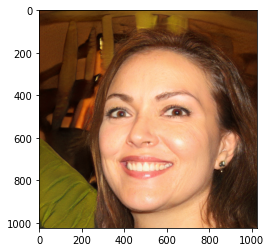

In [ ]:
imshow(img)